In [23]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Insert your features and labels
features = np.load("activation_maps_lines_image52_labelpixel.npy")
samples = np.load("activation_maps_lines_image52_pixel.npy")
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
samples_df = pd.DataFrame(samples,columns=np.arange(0,13))
samples_df['13']=features # Adding features coulmn into the samples datase

In [5]:
#Creating a table
data_table = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

dataframe_table = pd.DataFrame(data_table, index= [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
print(dataframe_table)

        age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no


In [16]:
# Converting  categorical features to numerical using Label Encoding
label_Encoder = LabelEncoder()

for column in dataframe_table.columns:
    dataframe_table[column] = label_Encoder.fit_transform(dataframe_table[column])

# Separate attributes  and target
instances = dataframe_table.drop(columns=['buys_computer'])
target = dataframe_table['buys_computer']

# Split the data into training and testing sets
Train_instance, Test_instance, Train_target, Test_target = train_test_split(instances, target, test_size=0.2, random_state=42)

In [9]:
# Function to find before entropy 
def calc_entropy_before(data):
    class_labels = data.unique()
    entropy = 0
    total_attributes = len(data)

    for label in class_labels:
        p = len(data[data == label]) / total_attributes
        entropy -= p * np.log2(p)

    return entropy

# Function to find after entropy 
def calc_entropy_after(data,target):
    total_attributes = len(data)
    weighted_entropy = 0

    for value in data.unique():
        positive_indices = data[data == value].index
        positive_target = target[positive_indices]
        positive_attributes = len(positive_indices)
        weighted_entropy += (positive_attributes / total_attributes) * calc_entropy_before(positive_target)
    return weighted_entropy

#Function to find Information gain
def information_gain(data,target):
    entropy_before_split = calc_entropy_before(target)
    entropy_after_split = calc_entropy_after(data,target)
    info_gain_index = entropy_before_split - entropy_after_split
    return info_gain_index 



In [13]:
# Calculate information gain for each feature
table_feature = instances.columns     # Use the column names of X as features
information_gain_list = {}

for feature in table_feature:
    information_gain_list[feature] = information_gain(instances[feature],target)
    print(f"Information Gain for {feature}: {information_gain_list[feature]}")

Information Gain for age: 0.24674981977443933
Information Gain for income: 0.02922256565895487
Information Gain for student: 0.15183550136234159
Information Gain for credit_rating: 0.04812703040826949


In [14]:
#function to find the root node
def calc_root_node(data):
    output = max(data,key=data.get)
    return output

root_node = calc_root_node(information_gain_list)
print("feature selcted for the decision tree is:",root_node)

feature selcted for the decision tree is: age


In [17]:
# Question A2
# Create and fit the Decision Tree model
model_for_table = DecisionTreeClassifier()
model_for_table.fit(Train_instance, Train_target)

# Calculate the depth of the constructed tree
treedepth_for_table = model_for_table.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth_for_table}")

The depth of the constructed Decision Tree is: 4


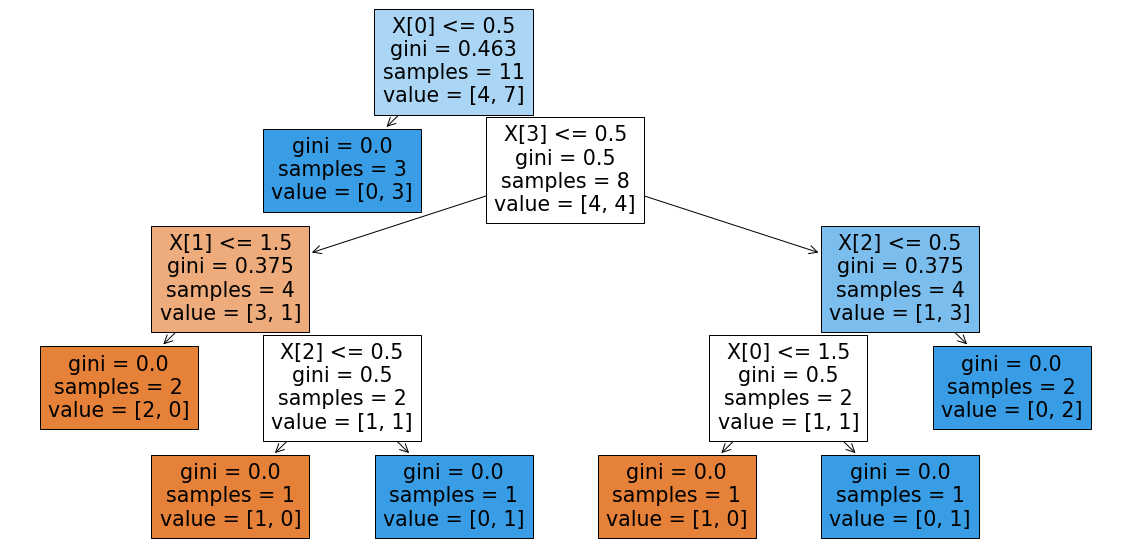

In [20]:
# Question A3
# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(model_for_table, filled=True)
plt.show()

In [22]:
# Calculate the accuracy on the training set
accuracy_for_table_train = model_for_table.score(Train_instance, Train_target)
print(f"Training Set Accuracy: {accuracy_for_table_train}")

# Calculate the accuracy on the test set
accuracy_for_table_test = model_for_table.score(Test_instance,Test_target)
print(f"Test Set Accuracy: {accuracy_for_table_train}")

Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


In [24]:
# Question A4
# Split the reshaped data into training and testing sets
data_train, data_test, output_train, output_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

In [25]:
# Create and fit the Decision Tree model
model_project = DecisionTreeClassifier()
model_project.fit(data_train, output_train)

# Calculate the depth of the constructed tree
treedepth_project = model_project.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth_project}")

# Calculate the accuracy on the training set
train_accuracy_project = model_project.score(data_train, output_train)
print(f"Training Set Accuracy: {train_accuracy_project}")

# Calculate the accuracy on the test set
test_accuracy_project = model_project.score(data_test,output_test)
print(f"Test Set Accuracy: {test_accuracy_project}")

The depth of the constructed Decision Tree is: 29
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.48153799206591397


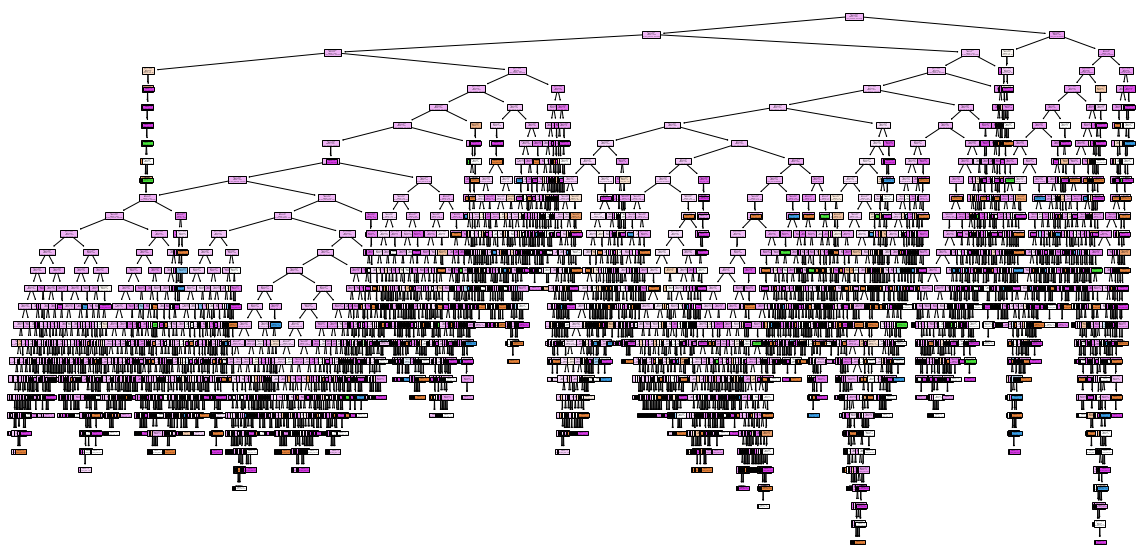

In [26]:
# Visualize the constructed tree
plt.figure(figsize=(20,10))
plot_tree(model_project, filled=True)
plt.show()

In [27]:
#Question A5
model_project_max_depth = DecisionTreeClassifier(max_depth=5)
model_project_max_depth.fit(data_train, output_train)

# Calculate the depth of the constructed tree
max_depth_treedepth = model_project_max_depth.get_depth()
print(f"The depth of the constructed Decision Tree is: {max_depth_treedepth}")

# Calculate the accuracy on the training set
max_depth_train_accuracy = model_project_max_depth.score(data_train, output_train)
print(f"Training Set Accuracy: {max_depth_train_accuracy}")

# Calculate the accuracy on the test set
max_depth_test_accuracy = model_project_max_depth.score(data_test,output_test)
print(f"Test Set Accuracy: {max_depth_test_accuracy}")

The depth of the constructed Decision Tree is: 5
Training Set Accuracy: 0.5551232166018158
Test Set Accuracy: 0.5605736954531584


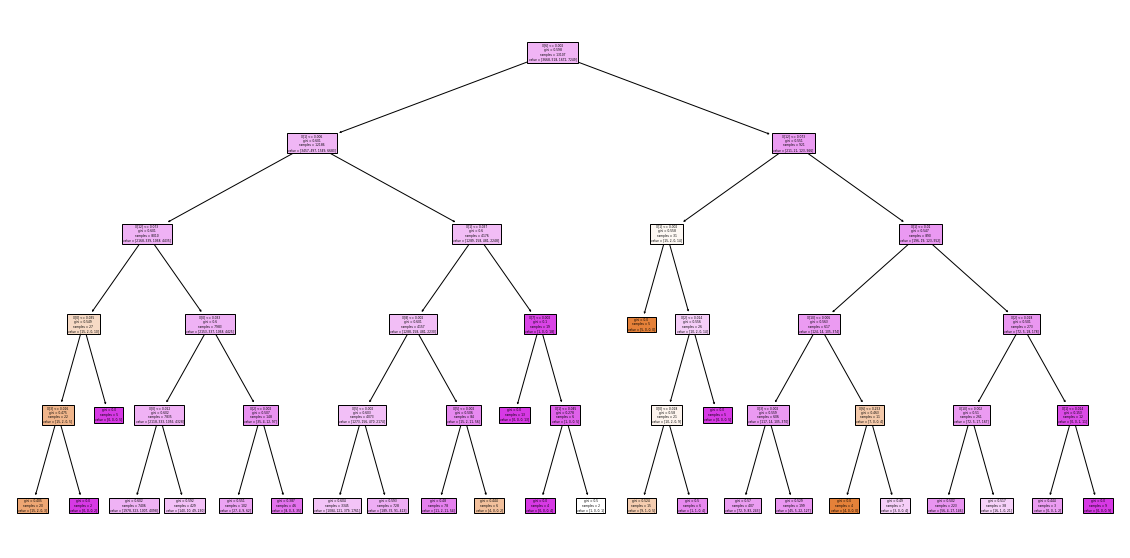

In [28]:
# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(model_project_max_depth, filled=True)
plt.show()

In [29]:
#Question A6
entropy_model_project = DecisionTreeClassifier(criterion='entropy')
entropy_model_project.fit(data_train, output_train)

# Calculate the depth of the constructed tree
entropy_model_treedepth = entropy_model_project.get_depth()
print(f"The depth of the constructed Decision Tree is: {entropy_model_treedepth}")

# Calculate the accuracy on the training set
entropy_model_train_accuracy = entropy_model_project.score(data_train, output_train)
print(f"Training Set Accuracy: {entropy_model_train_accuracy}")

# Calculate the accuracy on the test set
entropy_model_test_accuracy = entropy_model_project.score(data_test,output_test)
print(f"Test Set Accuracy: {entropy_model_test_accuracy}")

The depth of the constructed Decision Tree is: 29
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.4720781202319194


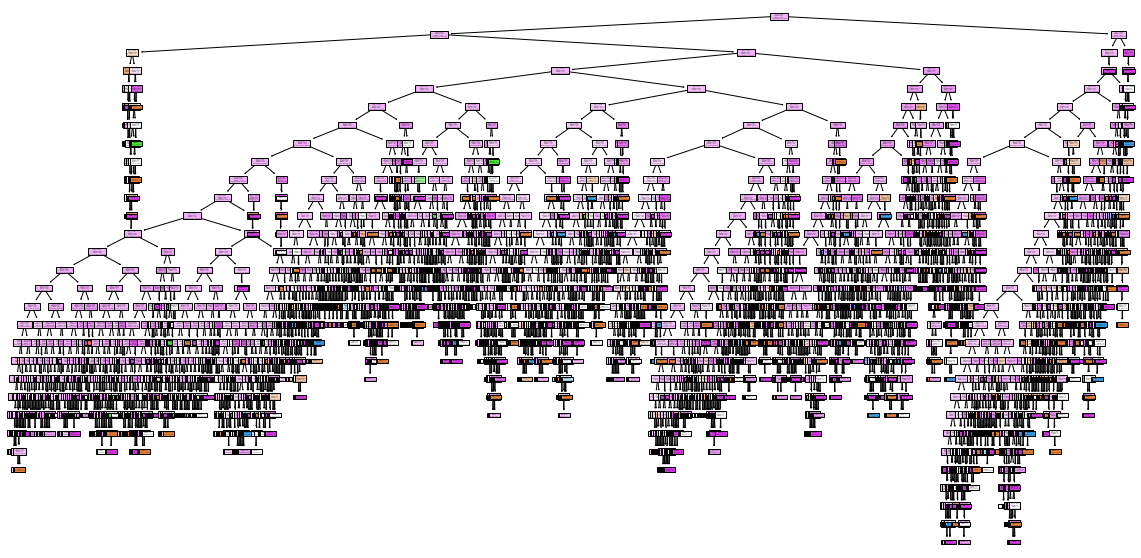

In [30]:
# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(entropy_model_project, filled=True)
plt.show()

In [39]:
# Question A7
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_forest = RandomForestClassifier(n_estimators=50)   # Assigning Hyper parameter
model_forest.fit(data_train, output_train)
data_pred = model_forest.predict(data_test)
accuracy_random_forest_test = metrics.accuracy_score(output_test, data_pred)
print("The accuracy of the random forest in testing is: ", accuracy_random_forest_test, "\n")

The accuracy of the random forest in testing is:  0.5025938358254501 



In [33]:
# Generate predictions with the best model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Create the confusion matrix
matrix = confusion_matrix(output_test, data_pred)   # calling Confusion matrix
print("The Confusion Matrix is :\n",matrix)

The Confusion Matrix is :
 [[ 144    2   27  763]
 [  11    0    5  110]
 [  38    0   13  325]
 [ 258    9   89 1483]]


In [35]:
print("The performance matrix is:\n",classification_report(R_F_output_test, data_pred))

The performance matrix is:
               precision    recall  f1-score   support

           0       0.32      0.15      0.21       936
           1       0.00      0.00      0.00       126
         128       0.10      0.03      0.05       376
         255       0.55      0.81      0.66      1839

    accuracy                           0.50      3277
   macro avg       0.24      0.25      0.23      3277
weighted avg       0.41      0.50      0.43      3277

